### 5 - Implementação da Classificação

- Nesta etapa, temos como objetivo implementar o processo de classificação de novos clientes, afim de personalizar as entregas do marketing para o mesmo, de forma automatizada. Sendo assim, vamo utilizar ferramentas de **Machine Learnig** da biblioteca **ScikitLearn**, as quais envolvem **Classificação Multiclasses** e métricas de seleção de modelos.

In [1]:
#Importação das bibliotecas

import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split


In [2]:
import sys
import os
sys.path.append(os.path.abspath("/home/edmurcn/Documentos/MeusProjetos/Customer-Clustering/src")) 

In [3]:
import model_train

In [4]:
# Importação do conjunto com a coluna de labels

df = pd.read_csv("/home/edmurcn/Documentos/MeusProjetos/Customer-Clustering/data/dados_label.csv", header=0)
df.head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Label
0,0,0,67,2,124670,1,2,0
1,1,1,22,1,150773,1,2,2
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,3
4,0,0,53,1,149031,1,1,3
5,0,0,35,1,144848,0,0,1
6,0,0,53,1,156495,1,1,3
7,0,0,35,1,193621,2,1,3
8,0,1,61,2,151591,0,0,0
9,0,1,28,1,174646,2,0,3


- Apesar do processo de tratamento e avaliação dos dados já ter sido realizado, pode-se avaliar a necessidade, ao longo dessa etapa, de tratar as colunas com dados categóricos com a técnica de **One Hot Enconder**. Agora, vamos dividir os dados entre conjuntos de treino 80% e teste 20%, para realizar a seleção de modelos.

In [5]:
#Transformando os dados em arrays
data = df.to_numpy()
X = data[:, :-1]
y = data[:,-1]

In [6]:
#Aplicando a divisão do conjunto

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)

In [7]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RF.fit(x_train, y_train)
pred_prob = model.predict_proba(x_test)
y_pred = model.predict(x_test)

{'Random Forest': RandomForestClassifier(), 'Lr': LogisticRegression(), 'DT': DecisionTreeClassifier()}


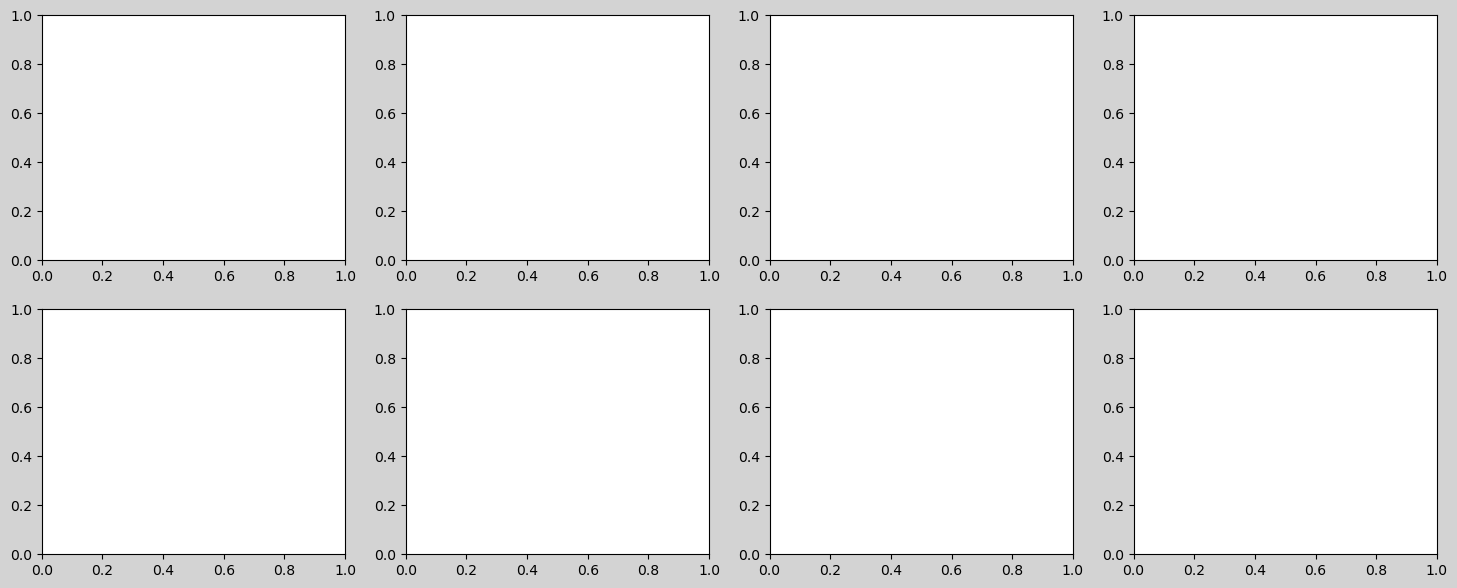

In [9]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, ConfusionMatrixDisplay, accuracy_score, f1_score, confusion_matrix
# from model_train import evaluation_model_multclass_classifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#binarize the y_values
classes=np.unique(y_test)

y_test_binarized=label_binarize(y_test,classes=classes)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()
aa = []

n_class = classes.shape[0]

# fig, ax = plt.subplots(1,2)

# # for i in range(0,len(classes)):    
# #     fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i], )
# #     roc_auc[i] = auc(fpr[i], tpr[i])
# #     sns.lineplot(x=fpr[i], y=tpr[i], linestyle='--', 
# #               label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]), ax=ax[0,0])

# for i in range(len(classes)):
#     fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:, i], pred_prob[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])
#     sns.lineplot(x=fpr[i], y=tpr[i], linestyle='--', 
#                  label='%s vs Rest (AUC=%0.2f)' % (classes[i], roc_auc[i]), ax=ax[1])


# print(f1_score(y_test, y_pred, average='micro') )
# a = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))

    # plotting    
    # plt.plot(fpr[i], tpr[i], linestyle='--', 
    #          label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

# plt.plot([0,1],[0,1],'b--')
# plt.xlim([0,1])
# plt.ylim([0,1.05])
# plt.title('Multiclass ROC curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive rate')
# plt.legend(loc='lower right')
# plt.show()


models = {"Random Forest": RandomForestClassifier(),
          "Lr": LogisticRegression(),
          "DT": DecisionTreeClassifier()}

scores, a = model_train.evaluation_model_multclass_classifier(models, X, y)
scores.head()
print(a)
